#Universidad Santo Tomás
Cristian Andres Contreras Robayo \
CC 1007467469\
Cód 2261170

La metodología empleada para el desarrollo del parcial es un algoritmo de clasificación para la base de datos de matemáticas. Ésta última está comúestas por las siguientes variables:\
\
1 escuela - escuela del estudiante (binario: "GP" - Gabriel Pereira o "MS" - Mousinho da Silveira)\
2 sexo - sexo del estudiante (binario: "F" - mujer o "M" - hombre)\
3 edad - edad del estudiante (numérica: de 15 a 22 años)\
4 dirección - tipo de domicilio del estudiante (binario: "U" - urbano o "R" - rural)\
5 famsize - tamaño de la familia (binario: "LE3" - menos o igual a 3 o "GT3" - más de 3)\
6 Pstatus - estado de cohabitación de los padres (binario: "T" - convivencia o "A" - separación)\
7 Medu - educación de la madre (numérico: 0 - ninguna, 1 - educación primaria (4º grado), 2 - 5º a 9º grado, 3 - educación secundaria o 4 - educación superior)\
8 Fedu - educación del padre (numérico: 0 - ninguna, 1 - educación primaria (4º grado), 2 - 5º a 9º grado, 3 - educación secundaria o 4 - educación superior)\
9 Mjob - trabajo de la madre (nominal: "profesor", "sanitario", "servicios" civiles (p. ej., administrativo o policía), "en casa" u "otro")\
10 Fjob - trabajo del padre (nominal: "profesor", "sanitario", "servicios" civiles (por ejemplo, administrativo o policía), "en_casa" u "otro")\
11 razón - razón para elegir esta escuela (nominal: cerca de "casa", "reputación" de la escuela, preferencia de "curso" u "otro")\
12 tutor - tutor del estudiante (nominal: "madre", "padre" u "otro")\
13 traveltime - tiempo de viaje de casa a la escuela (numérico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, o 4 - >1 hora)\
14 tiempo de estudio - tiempo de estudio semanal (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas)\
15 fallas - número de fallas de clase anteriores (numérico: n si 1<=n<3, si no, 4)\
16 schoolsup - apoyo educativo adicional (binario: sí o no)\
17 famsup - apoyo educativo de la familia (binario: sí o no)\N
18 paid - clases extra pagadas dentro de la asignatura del curso (Matemáticas o Portugués) (binario: sí o no)\
19 actividades - actividades extraescolares (binario: sí o no)\
20 guardería - asistió a la guardería (binario: sí o no)\
21 superior - quiere cursar estudios superiores (binario: sí o no)\
22 internet - acceso a internet en casa (binario: sí o no)\
23 romántica - con una relación romántica (binario: sí o no)\
24 famrel - calidad de las relaciones familiares (numérico: de 1 - muy malo a 5 - excelente)\
25 freetime - tiempo libre después de la escuela (numérico: de 1 - muy bajo a 5 - muy alto)\
26 goout - salir con los amigos (numérico: de 1 - muy bajo a 5 - muy alto)\
27 Dalc - consumo de alcohol en el día de trabajo (numérico: de 1 - muy bajo a 5 - muy alto)\
28 Walc - consumo de alcohol durante el fin de semana (numérico: de 1 - muy bajo a 5 - muy alto)\
29 salud - estado de salud actual (numérico: de 1 - muy bajo a 5 - muy alto)\
30 ausencias - número de faltas de asistencia a la escuela (numérico: de 0 a 93)\

Estas calificaciones están relacionadas con la asignatura del curso, Matemáticas o Portugués:\
31 G1 - calificación del primer período (numérico: de 0 a 20)\
31 G2 - calificación del segundo período (numérico: de 0 a 20)\
32 G3 - nota final (numérico: de 0 a 20)\

Nota adicional: hay varios (382) estudiantes que pertenecen a ambos conjuntos de datos.\
Estos alumnos pueden identificarse buscando atributos idénticos
que caracterizan a cada estudiante, como se muestra en el archivo R anexo.

## D

In [286]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt

In [287]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [288]:
Matematicas = pd.read_csv('/content/drive/MyDrive/Parcial 2 Python /student-mat.csv', 
                 sep = ';',
                 index_col=False)
Matematicas.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4.0,3,4,1,1,3.0,6.0,5.0,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5.0,3,3,1,1,3.0,4.0,5.0,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4.0,3,2,2,3,3.0,10.0,7.0,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3.0,2,2,1,1,5.0,2.0,15.0,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4.0,3,2,1,2,5.0,4.0,6.0,10,10


Parcial:
1.	Realice el proceso de verificación de calidad de datos y limpieza si es necesario realizarla. Mencione al final del punto, un resumen de los hallazgos encontrados.

### Características de los datos.

In [289]:
Matematicas.shape

(395, 33)

In [290]:
Matematicas.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,394.000000,395.000000,395.000000,395.000000,395.000000,394.000000,394.000000,394.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944162,3.235443,3.108861,1.481013,2.291139,3.555838,5.723350,10.916244,10.764557,10.440506
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.897794,0.998862,1.113278,0.890741,1.287897,1.391789,8.008082,3.320166,3.858244,4.628688
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,28.000000,24.000000


### Faltantes

In [291]:
for col in Matematicas.columns:
    num_missing = Matematicas[col].isnull().sum()
    pct_missing = np.mean(Matematicas[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

school - 0.0% - 0
sex - 0.25% - 1
age - 0.0% - 0
address - 0.51% - 2
famsize - 0.25% - 1
Pstatus - 0.0% - 0
Medu - 0.0% - 0
Fedu - 0.0% - 0
Mjob - 0.25% - 1
Fjob - 0.0% - 0
reason - 0.25% - 1
guardian - 0.0% - 0
traveltime - 0.0% - 0
studytime - 0.0% - 0
failures - 0.0% - 0
schoolsup - 0.25% - 1
famsup - 0.0% - 0
paid - 0.51% - 2
activities - 0.51% - 2
nursery - 0.0% - 0
higher - 0.25% - 1
internet - 0.0% - 0
romantic - 0.0% - 0
famrel - 0.25% - 1
freetime - 0.0% - 0
goout - 0.0% - 0
Dalc - 0.0% - 0
Walc - 0.0% - 0
health - 0.25% - 1
absences - 0.25% - 1
G1 - 0.25% - 1
G2 - 0.0% - 0
G3 - 0.0% - 0


In [292]:
# Total de datos faltantes en las variables.
Matematicas.isnull().sum().sum()

16

In [293]:
# Eliminación de los datos faltantes
Matematicas = Matematicas.dropna()

In [294]:
Matematicas.shape

(379, 33)

### Duplicados

In [295]:
Matematicas[Matematicas.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


### Consistencia

In [296]:
Matematicas.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,16.686016,2.759894,2.532982,1.451187,2.034301,0.340369,3.936675,3.232190,3.124011,1.490765,2.300792,3.546174,5.738786,10.957784,10.817942,10.532982
std,1.282396,1.102127,1.086641,0.704947,0.836587,0.754339,0.888611,0.980723,1.102152,0.900790,1.298870,1.395327,8.085054,3.337031,3.897645,4.611447
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,28.000000,24.000000


Según los valores que se presentan en la tabla resumen de arriba se observa que hay una inconsistecia en los datos de la variable G3; ya que esta puede tomar valores desde 0 hasta 20 y el valor que estamos observando como máximo es de 24.  

In [297]:
Matematicas[Matematicas['G3']==24]
Matematicas=Matematicas.drop([87],axis=0)

In [298]:
Matematicas.dtypes

school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health        float64
absences      float64
G1            float64
G2              int64
G3              int64
dtype: object

In [299]:
Matematicas['sex'].value_counts() # inconsistencia

F    198
M    179
B      1
Name: sex, dtype: int64

In [300]:
Matematicas['address'].value_counts()

U    295
R     83
Name: address, dtype: int64

In [301]:
Matematicas['school'].value_counts()

GP    337
MS     41
Name: school, dtype: int64

In [302]:
Matematicas['activities'].value_counts() # inconsistencia

no     189
yes    188
No       1
Name: activities, dtype: int64

In [303]:
Matematicas['famsize'].value_counts()

GT3    267
LE3    111
Name: famsize, dtype: int64

In [304]:
Matematicas['Mjob'].value_counts()

other       132
services    100
teacher      57
at_home      56
health       33
Name: Mjob, dtype: int64

In [305]:
Matematicas['Fjob'].value_counts()

other       205
services    107
teacher      28
at_home      20
health       18
Name: Fjob, dtype: int64

In [306]:
Matematicas['guardian'].value_counts() # inconsistencia

mother    261
father     84
other      32
Mother      1
Name: guardian, dtype: int64

In [307]:
Matematicas['schoolsup'].value_counts() # inconsistencia

no     327
yes     50
No       1
Name: schoolsup, dtype: int64

In [308]:
Matematicas['famsup'].value_counts() # inconsistencia

yes    233
no     144
No       1
Name: famsup, dtype: int64

In [309]:
Matematicas['nursery'].value_counts() # inconsistencia

yes    301
no      75
Yes      1
No       1
Name: nursery, dtype: int64

In [310]:
Matematicas['paid'].value_counts() # inconsistencia

no     207
yes    170
No       1
Name: paid, dtype: int64

In [311]:
Matematicas['internet'].value_counts() # inconsistencia

yes    315
no      62
No       1
Name: internet, dtype: int64

In [312]:
# Solución
Matematicas['G2'] = Matematicas['G2'].astype(int)
Matematicas[Matematicas['sex']=='B']
Matematicas=Matematicas.drop([295],axis=0)

In [313]:
Matematicas['sex'].value_counts()

F    198
M    179
Name: sex, dtype: int64

In [314]:
Matematicas['internet']=Matematicas['internet'].str.lower()
Matematicas['paid']=Matematicas['paid'].str.lower() 
Matematicas['nursery']=Matematicas['nursery'].str.lower() 
Matematicas['famsup']=Matematicas['famsup'].str.lower() 
Matematicas['schoolsup']=Matematicas['schoolsup'].str.lower() 
Matematicas['guardian']=Matematicas['guardian'].str.lower() 
Matematicas['activities']=Matematicas['activities'].str.lower() 

### Discretización

In [315]:
Matematicas['G3D'] = pd.qcut(Matematicas['G3'], q=5, precision=1)
Matematicas['G3D'] .value_counts()

(-0.1, 8.0]     96
(10.0, 12.0]    77
(8.0, 10.0]     76
(14.0, 20.0]    71
(12.0, 14.0]    57
Name: G3D, dtype: int64

In [316]:
Matematicas['G3D'] = pd.qcut(Matematicas['G3'], q=5, precision=1,labels=['Deficiente', 'Bajo', 'Medio', 'Alto','Superior' ])
Matematicas['G3D'] .value_counts()

Deficiente    96
Medio         77
Bajo          76
Superior      71
Alto          57
Name: G3D, dtype: int64

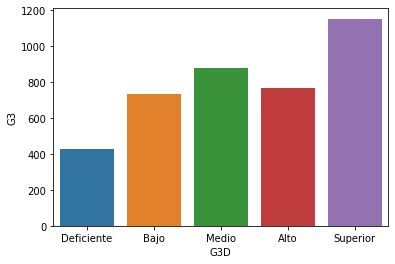

In [317]:
sns.barplot(data = Matematicas,
            estimator = sum,
            x = "G3D", 
            y = "G3",
            ci = None)

- En total la base de datos posee sólo 16 valores faltantes distribuidos en 13 variables, en las cuales se presentan máximo 2 datos faltantes. Estos datos se eliminan de la base con el fin de continuar con el análisis.
- No se presenta duplicidad de datos en las observaciones de la data, por otro lado el formato de G1 es entero no float; pero además de esto todos los formatos están correctamente asignados a las variables. En adición se encontraron variables categóricas no estandarizadas es decir que tenían categorías identicas pero su escritura difería.
- Se categorizó el rendimiento de los estudiantes en la prueba según 5 agrupaciones:
-- Deficiente: 0-8
-- Bajo: 9-10
-- Medio: 11-12
-- Alto: 13-14
-- Superior: 15-20


## 2.	Realice un análisis exploratorio sobre las variables que considere son relevantes para el modelo, teniendo en cuenta el tipo de variable, es decir, si es cuantitativa o cualitativa/categórica. Mencione al final de punto las variables considera que son relevantes para el modelo y escoja 5 según dichos criterios.


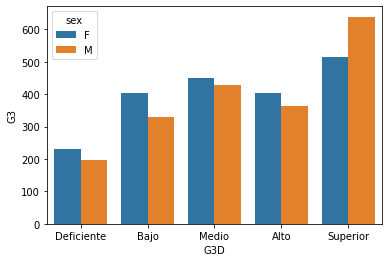

In [318]:
sns.barplot(data = Matematicas,
            estimator = sum,
            x = "G3D", 
            y = "G3",
            hue = "sex",
            ci = None)

Según el gráfico se puede identificar que las mujeres son las que obtuvieron mayores notas en matemáticas. Esto se vé en estudiantes con rendimiento deficiente, bajo, medio y alto.

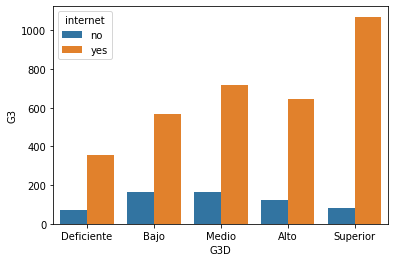

In [319]:
sns.barplot(data = Matematicas,
            estimator = sum,
            x = "G3D", 
            y = "G3",
            hue = "internet",
            ci = None)

El tener internet en casa parece ser una varibale importante en el desempeño académico de los estudiantes de los colegios, ya que cuando ésto poseen internet en sus cass obtienen en general mayores notas que cuando noposeen este recurso. 

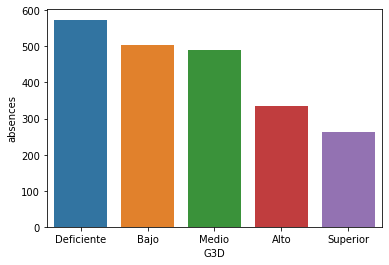

In [320]:
sns.barplot(data = Matematicas,
            estimator = sum,
            x = "G3D", 
            y = "absences",
            ci = None)

De este comportamiento se tiene que los estuadiante scon rendimiento deficiente son los que poseen una myor cantidal de ausencias en comparaicón con los que poseen un rendimeinto acadpemico superior en el área de matemáticas. 

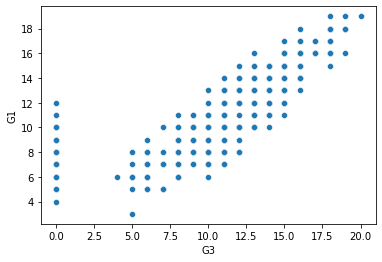

In [321]:
sns.scatterplot(data=Matematicas,  x="G3", y="G1") 

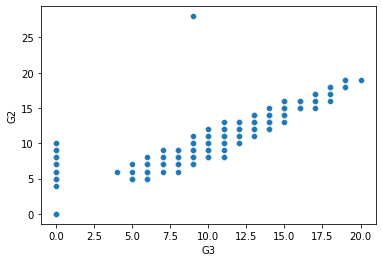

In [322]:
sns.scatterplot(data=Matematicas,  x="G3", y="G2") 

Como ya se especificó anteriormente hay una fuerte correlación entre las notas G1 y G2 con la variable respuesta G3.

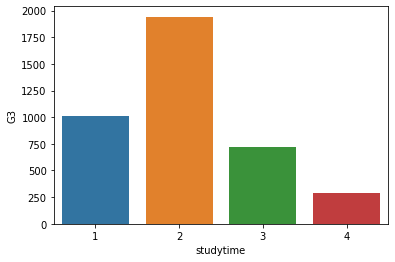

In [323]:
sns.barplot(data = Matematicas,
            estimator = sum,
            x = "studytime", 
            y = "G3",
            ci = None)

Cuando los estudiantes poseen tiempo de estudio entre 2 a 5 horas logran obtener mejores calificaciones en la signatura de matemáticas en comparación que cuando utilizan otros tiempos. 

Como resultado de este análisis las variables propuestas para la estimación de los modelos son las siguientes:
- Sexo
- Internet
- Tiempo de estudio.
- G1
- G2


In [324]:
# Variabe Respuesta
y = Matematicas['G3D']
# Variabe Explicativas
x1 = Matematicas[['G1', 'G2']]
x2 = pd.get_dummies(Matematicas[['sex','internet']], drop_first=True)
x3 = pd.get_dummies(Matematicas['studytime'], drop_first=True)
x = pd.concat([x1, x2, x3], axis=1)

## 3.	Seleccione un algoritmo de regresión clasificación según le corresponda (lineal, logístico o lasso o ridge) teniendo en cuenta lo siguiente:
- Estime el modelo utilizando las variables previamente seleccionadas utilizando todo el dataset. Varíe 2 de los parámetros del modelo en 3 posibles valores para cada uno.

In [350]:
from sklearn.linear_model import LogisticRegression
y = Matematicas['G3D']
lassoreg1 = LogisticRegression(C=0.001, penalty='l1',max_iter=10000,solver='liblinear')
lassoreg1.fit(x, y)
pre1 =lassoreg1.predict(x)
from sklearn import metrics
print('Accuracy',metrics.accuracy_score(y,pre1))
print('Precision',metrics.precision_score(y,pre1,average='macro'))

Accuracy 0.22281167108753316
Precision 0.239010989010989


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [351]:
lassoreg2 = LogisticRegression(C=0.1, penalty='l1',max_iter=1000000,solver='liblinear')
lassoreg2.fit(x, y)
pre2 =lassoreg2.predict(x)
print('Accuracy',metrics.accuracy_score(y,pre2))
print('Precision',metrics.precision_score(y,pre2,average='macro'))

Accuracy 0.53315649867374
Precision 0.3946539404370729


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [354]:
lassoreg3 = LogisticRegression(C=0.00001, penalty='l1',max_iter=1000,solver='liblinear')
lassoreg3.fit(x, y)
pre3 =lassoreg3.predict(x)
print('Accuracy',metrics.accuracy_score(y,pre3))
print('Precision',metrics.precision_score(y,pre3,average='macro'))

Accuracy 0.15119363395225463
Precision 0.030238726790450927


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



-	Estime el modelo utilizando únicamente una partición de entrenamiento (80%) and test (20%). Varíe 2 de los parámetros del modelo en 3 posibles valores para cada uno.

In [355]:
# Partición.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2 ,random_state=101010)

In [357]:
# Estimación de los modelos.
# Modelo 1
lassoreg1.fit(X_train, y_train)
pre1 =lassoreg1.predict(X_test)
print('Accuracy mod1',metrics.accuracy_score(y_test,pre1))
print('Precision mod1',metrics.precision_score(y_test,pre1,average='macro'))
# Modelo 2
lassoreg2.fit(X_train, y_train)
pre2 =lassoreg2.predict(X_test)
print('Accuracy mod2',metrics.accuracy_score(y_test,pre2))
print('Precision mod2',metrics.precision_score(y_test,pre2,average='macro'))
# Modelo 3
lassoreg3.fit(X_train, y_train)
pre3 =lassoreg3.predict(X_test)
print('Accuracy mod3',metrics.accuracy_score(y_test,pre3))
print('Precision mod3',metrics.precision_score(y_test,pre3,average='macro'))

Accuracy mod1 0.19736842105263158
Precision mod1 0.23513513513513512
Accuracy mod2 0.5526315789473685
Precision mod2 0.3472258064516129
Accuracy mod3 0.17105263157894737
Precision mod3 0.034210526315789476


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  

- Estime el modelo, utilizando la partición anterior, pero en la partición de entrenamiento utilizar un K Fold Cross Validation (k=5 y k=10).

In [360]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Kfold 5
cv15 = KFold(n_splits=5, random_state=1129, shuffle=True) 
scores15a = cross_val_score(lassoreg1,X_train, y_train, scoring='accuracy', cv=cv15, n_jobs=-1)
scores15p = cross_val_score(lassoreg1,X_train, y_train, scoring='precision', cv=cv15, n_jobs=-1)

cv25 = KFold(n_splits=5, random_state=1129, shuffle=True) 
scores25a = cross_val_score(lassoreg3,X_train, y_train, scoring='accuracy', cv=cv25, n_jobs=-1)
scores25p = cross_val_score(lassoreg3,X_train, y_train, scoring='precision', cv=cv25, n_jobs=-1)

cv35 = KFold(n_splits=5, random_state=1129, shuffle=True) 
scores35a = cross_val_score(lassoreg3,X_train, y_train, scoring='accuracy', cv=cv35, n_jobs=-1)
scores35p = cross_val_score(lassoreg3,X_train, y_train, scoring='precision', cv=cv35, n_jobs=-1)

# Kfold 10
cv110 = KFold(n_splits=10, random_state=1129, shuffle=True) 
scores110a = cross_val_score(lassoreg1,X_train, y_train, scoring='accuracy', cv=cv110, n_jobs=-1)
scores110p = cross_val_score(lassoreg1,X_train, y_train, scoring='precision', cv=cv110, n_jobs=-1)

cv210 = KFold(n_splits=10, random_state=1129, shuffle=True) 
scores210a = cross_val_score(lassoreg3,X_train, y_train, scoring='accuracy', cv=cv210, n_jobs=-1)
scores210p = cross_val_score(lassoreg3,X_train, y_train, scoring='precision', cv=cv210, n_jobs=-1)

cv310 = KFold(n_splits=10, random_state=1129, shuffle=True) 
scores310a = cross_val_score(lassoreg3,X_train, y_train, scoring='accuracy', cv=cv310, n_jobs=-1)
scores310p = cross_val_score(lassoreg3,X_train, y_train, scoring='precision', cv=cv310, n_jobs=-1)


-	Para cada uno de los anteriores puntos, seleccionar dos métricas y evaluar los modelos teniendo en cuenta que el resultado a presentar y analizar será en la partición de test.

## 4.	Analice
- ¿Cuál fue el mejor modelo según las métricas anteriormente mencionadas?
-	De la respuesta anterior ¿Qué valores de los parámetros se seleccionaron para lograr dicho resultado?
- Analice los coeficientes del modelo final seleccionado
